## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = (x-x.min()) / (x.max()-x.min()) * 2 -1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

# Homework 1
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 14s 289us/step - loss: 1.6690 - acc: 0.4069 - val_loss: 1.5302 - val_acc: 0.4532
Epoch 2/100
50000/50000 [==============================] - 15s 293us/step - loss: 1.4452 - acc: 0.4873 - val_loss: 1.4441 - val_acc: 0.4882
Epoch 3/100
50000/50000 [==============================] - 15s 292us/step - loss: 1.3198 - acc: 0.5362 - val_loss: 1.4102 - val_acc: 0.5042
Epoch 4/100
50000/50000 [==============================] - 14s 279us/step - loss: 1.2267 - acc: 0.5671 - val_loss: 1.3827 - val_acc: 0.5185
Epoch 5/100
50000/50000 [==============================] - 14s 277us/step - loss: 1.1371 - acc: 0.6012 - val_loss: 1.3693 - val_acc: 0.5279
Epoch 6/100
50000/50000 [==============================] - 15s 301us/step - loss: 1.0552 - acc: 0.6270 - val_loss: 1.3694 - val_acc: 0.5264
Epoch 7/100
50000/50000 [==============================] - 14s

50000/50000 [==============================] - 13s 258us/step - loss: 0.1024 - acc: 0.9682 - val_loss: 3.9416 - val_acc: 0.5233s: 0 - ETA: 2s - loss: 0.0987 - ac - ETA: 1s - lo
Epoch 57/100
50000/50000 [==============================] - 12s 245us/step - loss: 0.1096 - acc: 0.9641 - val_loss: 3.9494 - val_acc: 0.5199
Epoch 58/100
50000/50000 [==============================] - 12s 244us/step - loss: 0.0806 - acc: 0.9729 - val_loss: 3.9449 - val_acc: 0.5308
Epoch 59/100
50000/50000 [==============================] - 12s 241us/step - loss: 0.0999 - acc: 0.9681 - val_loss: 3.9546 - val_acc: 0.5189
Epoch 60/100
50000/50000 [==============================] - 12s 248us/step - loss: 0.0956 - acc: 0.9693 - val_loss: 3.9204 - val_acc: 0.5267
Epoch 61/100
50000/50000 [==============================] - 12s 248us/step - loss: 0.0916 - acc: 0.9694 - val_loss: 3.9965 - val_acc: 0.5205
Epoch 62/100
50000/50000 [==============================] - 12s 245us/step - loss: 0.1076 - acc: 0.9658 - val_loss: 4.

In [10]:
import matplotlib.pyplot as plt

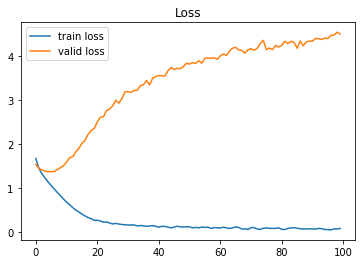

In [11]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

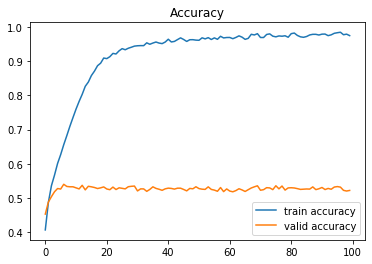

In [12]:
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [13]:
# Homework 2
model = build_mlp(input_shape=x_train.shape[1:], num_neurons=[512, 256, 128, 64, 32])
model.summary()

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

50000/50000 [==============================] - 12s 246us/step - loss: 0.1351 - acc: 0.9546 - val_loss: 3.5290 - val_acc: 0.5212
Epoch 50/100
50000/50000 [==============================] - 12s 248us/step - loss: 0.1194 - acc: 0.9606 - val_loss: 3.6951 - val_acc: 0.5252
Epoch 51/100
50000/50000 [==============================] - 12s 247us/step - loss: 0.1406 - acc: 0.9531 - val_loss: 3.5934 - val_acc: 0.5228
Epoch 52/100
50000/50000 [==============================] - 12s 247us/step - loss: 0.1153 - acc: 0.9611 - val_loss: 3.7216 - val_acc: 0.5191
Epoch 53/100
50000/50000 [==============================] - 12s 245us/step - loss: 0.1159 - acc: 0.9605 - val_loss: 3.7189 - val_acc: 0.5200
Epoch 54/100
50000/50000 [==============================] - 13s 250us/step - loss: 0.1030 - acc: 0.9654 - val_loss: 3.8431 - val_acc: 0.5181
Epoch 55/100
50000/50000 [==============================] - 13s 251us/step - loss: 0.1275 - acc: 0.9571 - val_loss: 3.7299 - val_acc: 0.5226
Epoch 56/100
50000/50000 [

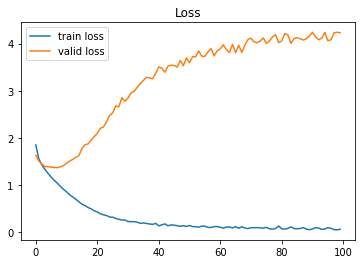

In [14]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

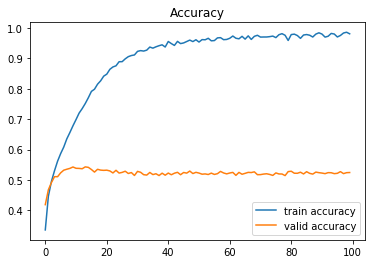

In [15]:
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()